Dataset Shape: (1118669, 34)


,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,...,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-05-01,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,...,True,Republic Day Sale,NaN,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,21947.26,0.00,...,False,NaN,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.0,Delivered,1,2015,1,0.20,True,4.1


----- PRICE vs DEMAND -----


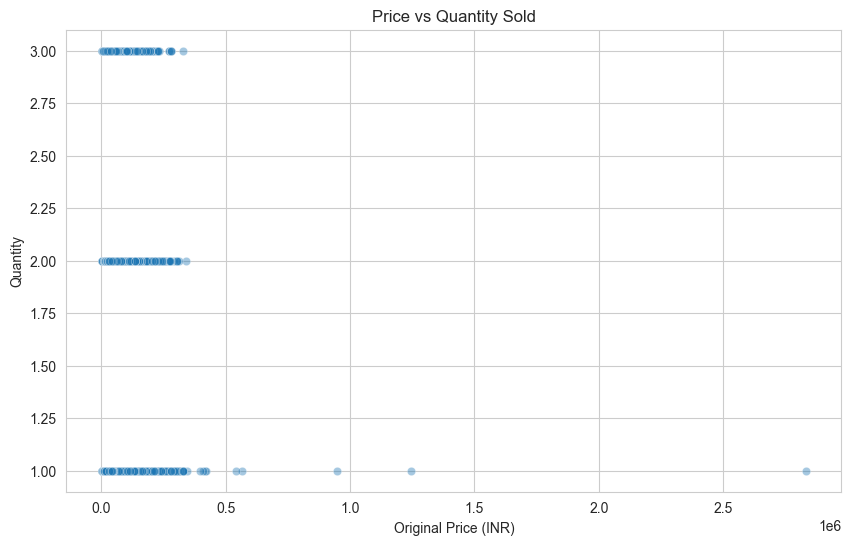

,avg_price,avg_qty,total_qty
category,,,
Electronics,66355.787732,1.252061,1400642


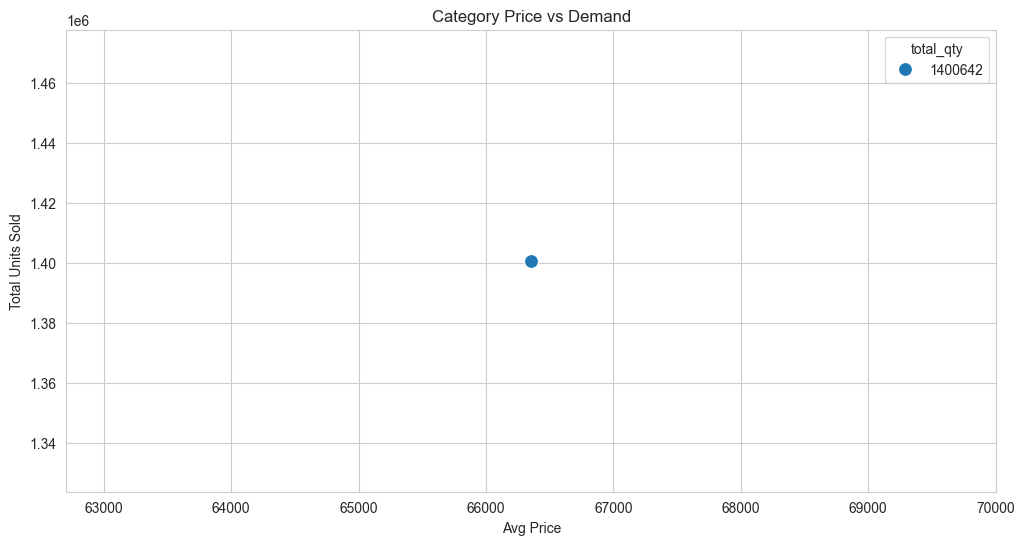

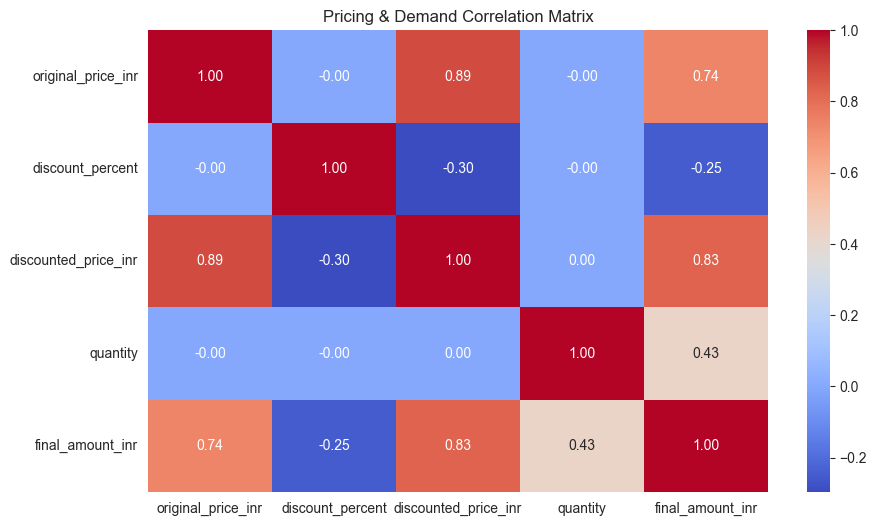

----- DISCOUNT EFFECTIVENESS -----


,discount_bucket,avg_qty,avg_revenue,total_revenue
0,0-10,1.251673,76580.030667,4.107217e+09
1,10-20,1.252740,69696.528253,9.709911e+09
2,20-30,1.249969,62048.403575,1.064533e+10
3,30-40,1.252223,53851.082305,3.378725e+09
4,40-50,1.249644,45275.948617,2.862436e+09
5,50+,1.252865,33071.555029,4.180873e+09


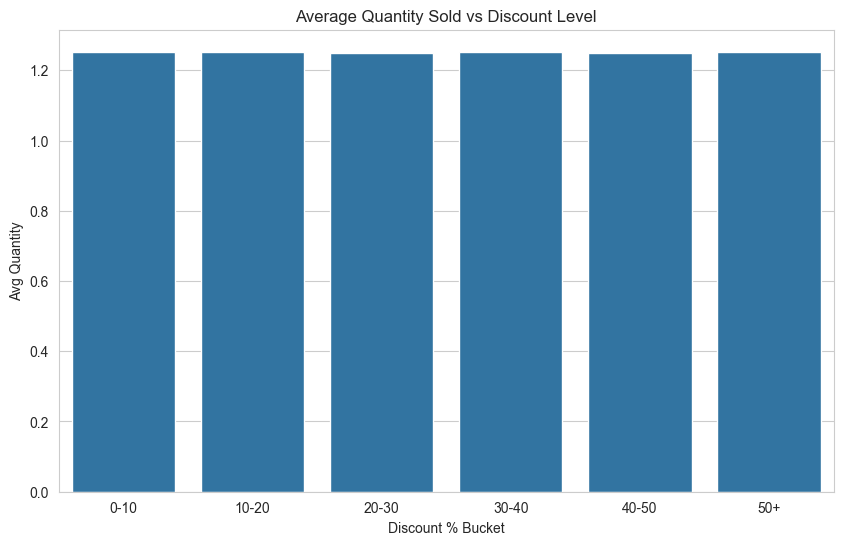

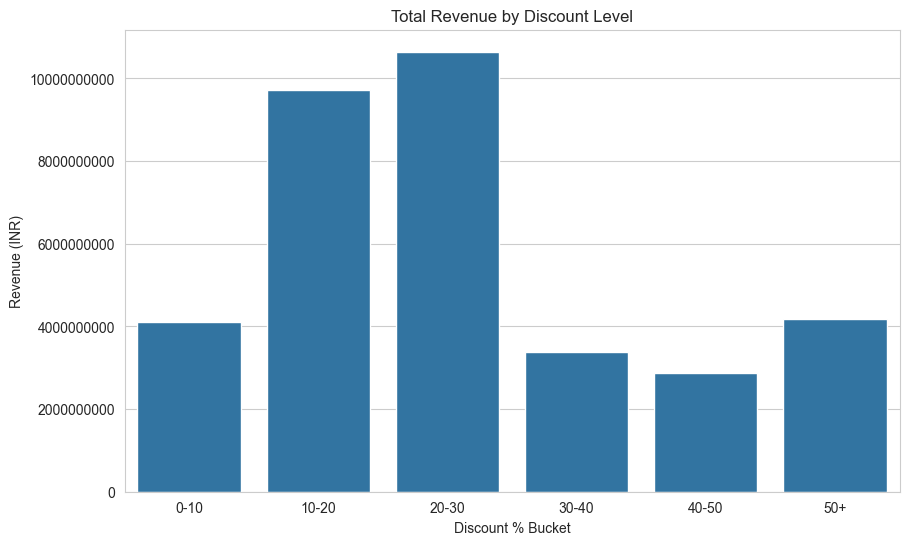

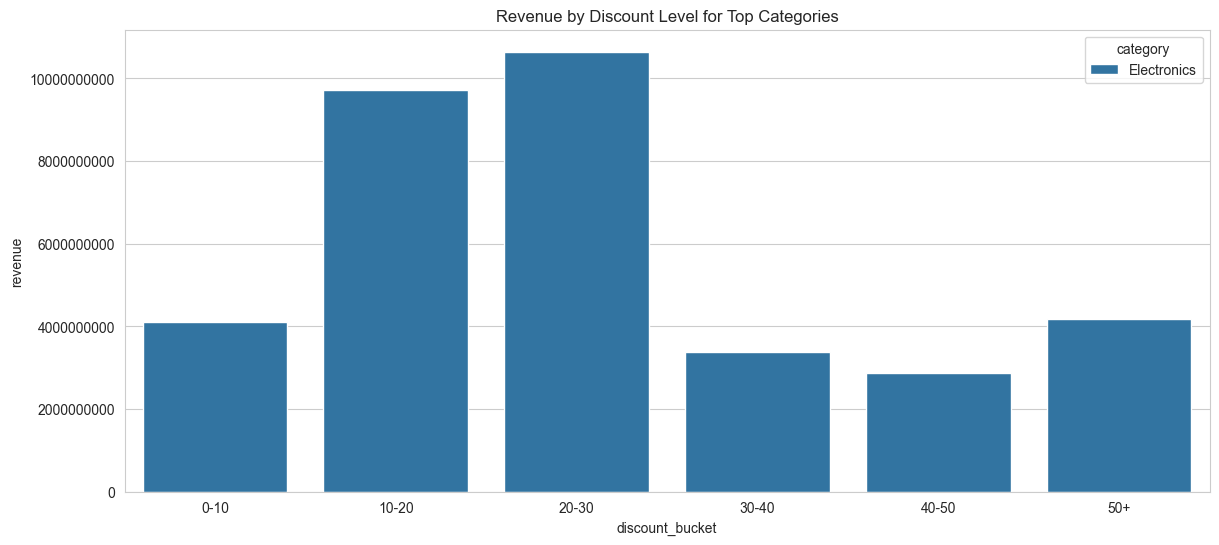

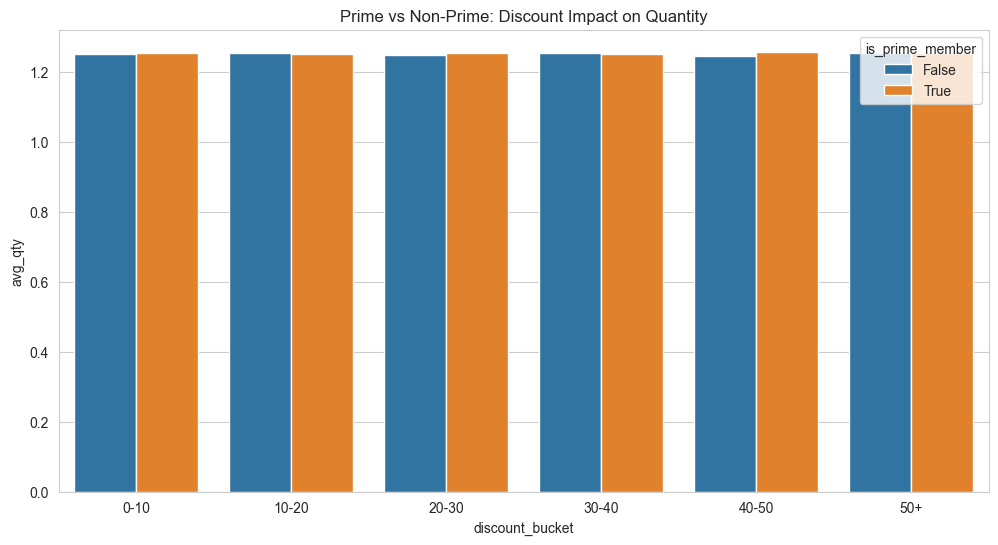

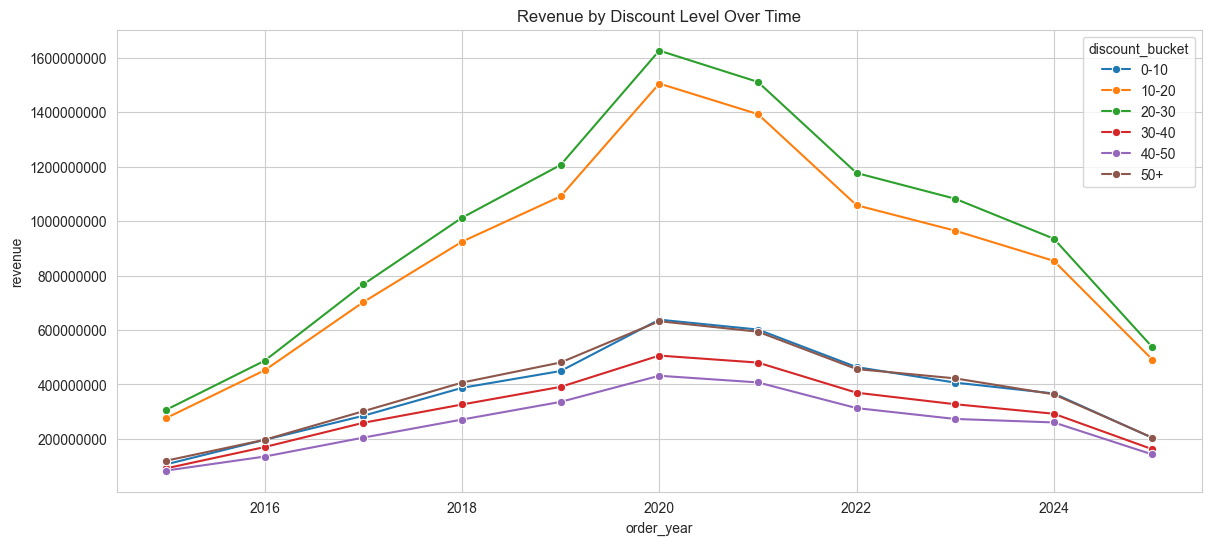

✅ EDA_09 COMPLETED SUCCESSFULLY


In [1]:
# ============================================================
# EDA_09 : Pricing & Discount Effectiveness
# Covers Q10 and Q15
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ============================================================
# LOAD MASTER DATA
# ============================================================

df = pd.read_csv("../master/amazon_india_master_2015_2025.csv")

print("Dataset Shape:", df.shape)
display(df.head())

# ============================================================
# BASIC CLEAN
# ============================================================

df["order_date"] = pd.to_datetime(df["order_date"])

num_cols = [
    "original_price_inr",
    "discount_percent",
    "discounted_price_inr",
    "quantity",
    "final_amount_inr"
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# ============================================================
# QUESTION 10 : PRICE vs DEMAND
# ============================================================

print("----- PRICE vs DEMAND -----")

# Scatter: Price vs Quantity
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df.sample(20000, random_state=42),
    x="original_price_inr",
    y="quantity",
    alpha=0.4
)
plt.title("Price vs Quantity Sold")
plt.xlabel("Original Price (INR)")
plt.ylabel("Quantity")
plt.show()

# ============================================================
# CATEGORY WISE PRICE-DEMAND
# ============================================================

cat_price_demand = (
    df.groupby("category")
      .agg(
          avg_price=("original_price_inr","mean"),
          avg_qty=("quantity","mean"),
          total_qty=("quantity","sum")
      )
      .sort_values("avg_price")
)

display(cat_price_demand)

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=cat_price_demand,
    x="avg_price",
    y="total_qty",
    size="total_qty",
    sizes=(100,1000)
)
plt.title("Category Price vs Demand")
plt.xlabel("Avg Price")
plt.ylabel("Total Units Sold")
plt.show()

# ============================================================
# CORRELATION MATRIX
# ============================================================

corr_cols = [
    "original_price_inr",
    "discount_percent",
    "discounted_price_inr",
    "quantity",
    "final_amount_inr"
]

plt.figure(figsize=(10,6))
sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Pricing & Demand Correlation Matrix")
plt.show()

# ============================================================
# QUESTION 15 : DISCOUNT EFFECTIVENESS
# ============================================================

print("----- DISCOUNT EFFECTIVENESS -----")

# Create discount bins
df["discount_bucket"] = pd.cut(
    df["discount_percent"],
    bins=[0,10,20,30,40,50,100],
    labels=["0-10","10-20","20-30","30-40","40-50","50+"]
)

discount_perf = (
    df.groupby("discount_bucket")
      .agg(
          avg_qty=("quantity","mean"),
          avg_revenue=("final_amount_inr","mean"),
          total_revenue=("final_amount_inr","sum")
      )
      .reset_index()
)

display(discount_perf)

# ============================================================
# DISCOUNT vs SALES VOLUME
# ============================================================

plt.figure(figsize=(10,6))
sns.barplot(
    data=discount_perf,
    x="discount_bucket",
    y="avg_qty"
)
plt.title("Average Quantity Sold vs Discount Level")
plt.xlabel("Discount % Bucket")
plt.ylabel("Avg Quantity")
plt.show()

# ============================================================
# DISCOUNT vs REVENUE
# ============================================================

plt.figure(figsize=(10,6))
sns.barplot(
    data=discount_perf,
    x="discount_bucket",
    y="total_revenue"
)
plt.title("Total Revenue by Discount Level")
plt.xlabel("Discount % Bucket")
plt.ylabel("Revenue (INR)")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

# ============================================================
# CATEGORY x DISCOUNT ANALYSIS
# ============================================================

cat_disc = (
    df.groupby(["category","discount_bucket"])
      .agg(
          revenue=("final_amount_inr","sum"),
          qty=("quantity","sum")
      )
      .reset_index()
)

top_cat = (
    df.groupby("category")["final_amount_inr"]
      .sum()
      .sort_values(ascending=False)
      .head(6)
      .index
)

plt.figure(figsize=(14,6))
sns.barplot(
    data=cat_disc[cat_disc["category"].isin(top_cat)],
    x="discount_bucket",
    y="revenue",
    hue="category"
)
plt.title("Revenue by Discount Level for Top Categories")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

# ============================================================
# PRIME vs NON PRIME DISCOUNT IMPACT
# ============================================================

prime_disc = (
    df.groupby(["is_prime_member","discount_bucket"])
      .agg(
          avg_qty=("quantity","mean"),
          avg_revenue=("final_amount_inr","mean")
      )
      .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=prime_disc,
    x="discount_bucket",
    y="avg_qty",
    hue="is_prime_member"
)
plt.title("Prime vs Non-Prime: Discount Impact on Quantity")
plt.show()

# ============================================================
# YEARLY DISCOUNT EFFECTIVENESS
# ============================================================

year_disc = (
    df.groupby(["order_year","discount_bucket"])
      .agg(
          revenue=("final_amount_inr","sum")
      )
      .reset_index()
)

plt.figure(figsize=(14,6))
sns.lineplot(
    data=year_disc,
    x="order_year",
    y="revenue",
    hue="discount_bucket",
    marker="o"
)
plt.title("Revenue by Discount Level Over Time")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

print("✅ EDA_09 COMPLETED SUCCESSFULLY")
